# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202210

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Nicer plots
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

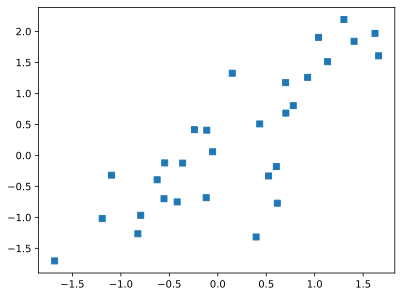

In [65]:
# create data

N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

In [66]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [67]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [68]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)


## Train the model!
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x)

  # compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

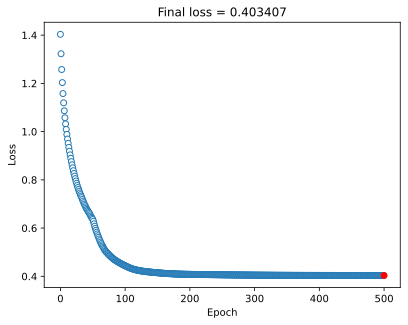

In [69]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [70]:
testloss.item()

0.40340656042099

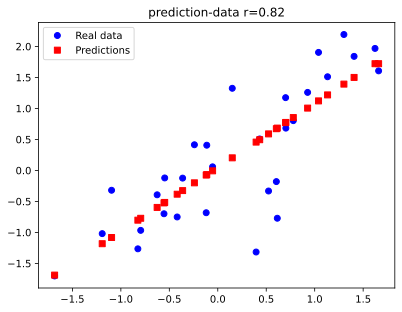

In [71]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

# Additional explorations

In [ ]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets. 
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
#       N = 5 is too low -> Loss 0.41
#       N = 10 is too low -> Loss 0.80
#       N = 20 is sufficient -> Loss 0.21
#       N = 3000 is too much -> Loss is 0.26, but the ReLu function is visible in the prediction (overfitting?)
# 
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
#       N = 10, Noise is /10, the system breaks and the prediction is a straight line, with 0.93 loss (not consistent, works well other times)
#       Second run gives a very high accuracy, low loss. So less noise makes the system more accurate and decreases the loss and allows us
#       to reduce N.
# 
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.
#       First run -> 51 out of 100
#       Second run -> 58 out of 100
#       It seems that the system struggles to obtain a loss below 0.25

In [109]:
## Fixed parameters
trainingRepeats = 100
N = 30
learningRate = .05
numepochs = 500

# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
)

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

# loss function
lossfun = nn.MSELoss()

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()

HighLossCounts = 0

## Loop to test the loss over 100 iterations:
allLosses = []
for iter in range(trainingRepeats):

    # Create data
    x = torch.randn(N,1)
    y = x + torch.randn(N,1)/2

    # Reset the model
    ANNreg.apply(weight_reset)

    ## Train the model!
    losses = torch.zeros(numepochs)
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNreg(x)

        # compute loss
        loss = lossfun(yHat,y)
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    allLosses.append(losses.detach())

    # manually compute losses
    # final forward pass
    predictions = ANNreg(x)

    # final loss (MSE)
    testloss = (predictions-y).pow(2).mean()

    if testloss > 0.25:
        HighLossCounts += 1

print(f"{HighLossCounts} out of 100 where above 0.25 loss")

50 out of 100 where above 0.25 loss
